In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/Toshiba/Documents/GitHub/MIE_2.02_GeoInfo_WS2020/data/generated/DWD/hourly/precipitation/historical/prec_ts_appended_4.csv',sep=";")
data2 = pd.read_csv('Area_of_interest_NRW_13_Counties.csv',sep=",")

In [3]:
data.tail()

,mess_datum,station_id,r1,longitude,latitude
244838,2017-08-16 20:00:00,15000,0.0,6.0244,50.7983
244839,2017-08-16 21:00:00,15000,0.0,6.0244,50.7983
244840,2017-08-16 22:00:00,15000,0.0,6.0244,50.7983
244841,2017-08-16 23:00:00,15000,0.0,6.0244,50.7983
244842,2017-08-17 00:00:00,15000,0.0,6.0244,50.7983


In [4]:
data['mess_datum']=pd.to_datetime(data.mess_datum, format='%Y/%m/%d %H:%M:%S')

In [5]:
data.insert(loc=5, column='day', value=(data.mess_datum.dt.date))

In [6]:
data.tail()

,mess_datum,station_id,r1,longitude,latitude,day
244838,2017-08-16 20:00:00,15000,0.0,6.0244,50.7983,2017-08-16
244839,2017-08-16 21:00:00,15000,0.0,6.0244,50.7983,2017-08-16
244840,2017-08-16 22:00:00,15000,0.0,6.0244,50.7983,2017-08-16
244841,2017-08-16 23:00:00,15000,0.0,6.0244,50.7983,2017-08-16
244842,2017-08-17 00:00:00,15000,0.0,6.0244,50.7983,2017-08-17


### Cumulating daily precipitation for four months may 2017 to august 2017

In [7]:
indx = data[data['station_id'].isin([216,389,390,613,644,796,934,1300,2483,2947,3028,3031,3098,3215,3499,4127,4313,4368,
                                      4400,4488,4692,5347,5360,5468,5480,5619,5699,6264,6276,6313,7330,13700,13713])]
indx_1 = data[data['station_id'].isin([4692,5468,6276])]

In [8]:
indx

,mess_datum,station_id,r1,longitude,latitude,day
0,2017-04-16 00:00:00,216,0.0,7.8807,51.1143,2017-04-16
1,2017-04-16 01:00:00,216,0.1,7.8807,51.1143,2017-04-16
2,2017-04-16 02:00:00,216,0.1,7.8807,51.1143,2017-04-16
3,2017-04-16 03:00:00,216,0.0,7.8807,51.1143,2017-04-16
4,2017-04-16 04:00:00,216,0.0,7.8807,51.1143,2017-04-16
...,...,...,...,...,...,...
241885,2017-08-16 20:00:00,13713,0.0,7.6289,51.0899,2017-08-16
241886,2017-08-16 21:00:00,13713,0.0,7.6289,51.0899,2017-08-16
241887,2017-08-16 22:00:00,13713,0.0,7.6289,51.0899,2017-08-16
241888,2017-08-16 23:00:00,13713,0.0,7.6289,51.0899,2017-08-16


In [9]:
#hourly precipitation rate to daily rate
df_1 = indx.groupby(['day','station_id','longitude','latitude'])['r1'].sum().to_frame(name = 'daily_prep').reset_index()

In [10]:
df_1

,day,station_id,longitude,latitude,daily_prep
0,2017-04-16,216,7.8807,51.1143,4.3
1,2017-04-16,389,8.4318,51.0148,5.0
2,2017-04-16,390,8.3683,50.9837,2.2
3,2017-04-16,613,9.2324,51.5677,0.8
4,2017-04-16,644,9.1738,51.7049,1.9
...,...,...,...,...,...
3715,2017-08-17,6264,8.6500,51.4140,0.0
3716,2017-08-17,6313,7.4672,51.2488,0.0
3717,2017-08-17,7330,7.9780,51.4633,0.0
3718,2017-08-17,13700,7.3411,51.3329,0.0


In [11]:
#daily precipitation to overall rainfall for four months(may-august)
df_2 = df_1.groupby(['station_id','longitude','latitude'])['daily_prep'].sum().to_frame(name = 'overall_rain').reset_index()

In [12]:
df_2 # 3 stations are missing,should be 33 stations!! dont know why???

,station_id,longitude,latitude,overall_rain
0,216,7.8807,51.1143,322.7
1,389,8.4318,51.0148,335.8
2,390,8.3683,50.9837,378.5
3,613,9.2324,51.5677,395.1
4,644,9.1738,51.7049,387.6
5,796,8.1257,50.7556,417.4
6,934,8.5658,51.7835,348.4
7,1300,8.1565,51.2540,412.1
8,2483,8.4891,51.1803,501.6
9,2947,8.0348,51.1333,294.7


In [13]:
data2 = data2.set_index('station_id')

In [14]:
data2.head()

,fid,date_from,date_to,altitude,latitude,longitude,name,state,fid_2,ADE,...,SN_K,SN_V1,SN_V2,SN_G,FK_S3,NUTS,RS_0,AGS_0,WSK,DEBKG_ID
station_id,,,,,,,,,,,,,,,,,,,,,
216,2,2004-10-01,2021-02-11,298,51.1143,7.8807,Attendorn-Neulisternohl,Nordrhein-Westfalen,50,4,...,66,0,0,0,R,DEA59,59660000000,5966000,2009/01/01,DEBKGDL20000DZXQ
389,4,2009-11-01,2021-02-11,436,51.0148,8.4318,"Berleburg, Bad-Arfeld",Nordrhein-Westfalen,51,4,...,70,0,0,0,R,DEA5A,59700000000,5970000,2009/01/01,DEBKGDL20000E1WH
390,5,2004-07-01,2021-02-11,610,50.9837,8.3683,"Berleburg, Bad-St�nzel",Nordrhein-Westfalen,51,4,...,70,0,0,0,R,DEA5A,59700000000,5970000,2009/01/01,DEBKGDL20000E1WH
613,10,2004-11-01,2021-02-11,206,51.5677,9.2324,Borgentreich,Nordrhein-Westfalen,38,4,...,62,0,0,0,R,DEA44,57620000000,5762000,2009/01/01,DEBKGDL20000E5W8
644,12,2005-01-01,2021-02-11,150,51.7049,9.1738,Brakel,Nordrhein-Westfalen,38,4,...,62,0,0,0,R,DEA44,57620000000,5762000,2009/01/01,DEBKGDL20000E5W8


In [15]:
df_2 = df_2.set_index('station_id')

In [16]:
df_2.head()

,longitude,latitude,overall_rain
station_id,,,
216,7.8807,51.1143,322.7
389,8.4318,51.0148,335.8
390,8.3683,50.9837,378.5
613,9.2324,51.5677,395.1
644,9.1738,51.7049,387.6


In [17]:
df_2 = df_2.join(data2['altitude'])

In [18]:
df_2.tail() #check altitudes!!! some are wrong

,longitude,latitude,overall_rain,altitude
station_id,,,,
6264,8.6500,51.4140,389.9,457
6313,7.4672,51.2488,386.9,440
7330,7.9780,51.4633,418.2,159
13700,7.3411,51.3329,357.1,205
13713,7.6289,51.0899,402.4,386


## Plotting the relationship of the Overall Rainfall vs Altitude

In [19]:
df_2.reset_index(level=0, inplace=True)

In [20]:
df_2.head()

,station_id,longitude,latitude,overall_rain,altitude
0,216,7.8807,51.1143,322.7,298
1,389,8.4318,51.0148,335.8,436
2,390,8.3683,50.9837,378.5,610
3,613,9.2324,51.5677,395.1,206
4,644,9.1738,51.7049,387.6,150


In [21]:
#df_2.sort_values('altitude')

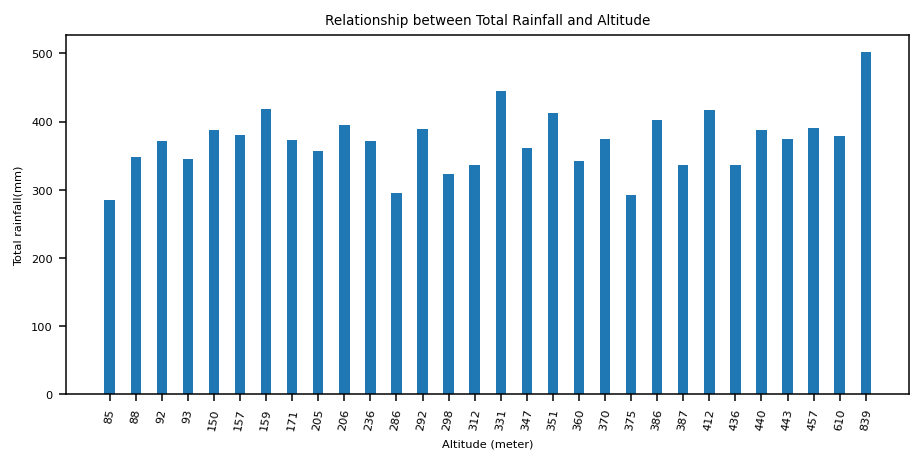

In [22]:
w = 0.4
fig = plt.figure(dpi= 136, figsize=(8,3.5))
plt.rcParams.update({'font.size': 6})

df_2 = df_2.sort_values('altitude')
#bar1 = np.arange(len(df_2['station_id']))
bar1 = np.arange(len(df_2['altitude']))

plt.bar(bar1,df_2['overall_rain'],w)


plt.xlabel('Altitude (meter)')
plt.ylabel('Total rainfall(mm)')
plt.title('Relationship between Total Rainfall and Altitude')
plt.xticks(bar1,df_2['altitude'],rotation=80)
plt.savefig('C:/Users/Toshiba/Desktop/Master courses/Geoinformatics/Exercises/Exam files/AltitudevsRainfall')

plt.show()

In [23]:
filepathname = "overall_rainfall_13_counties.csv"
print("df_2 saved to: %s" % (filepathname))
df_2.to_csv(filepathname,sep=";")

df_2 saved to: overall_rainfall_13_counties.csv


## Comparing station altitudes with the DTM altitudes

In [24]:
data_dtm = pd.read_csv('DTM_and_stations_altitudes.csv',sep=",")

In [25]:
data_dtm

,fid,field_1,station_id,longitude,latitude,overall_ra,altitude,DTM_German
0,1,0,216,7.8807,51.1143,322.7,298,298.100006
1,2,1,389,8.4318,51.0148,335.8,436,433.500000
2,3,2,390,8.3683,50.9837,378.5,610,609.100037
3,4,3,613,9.2324,51.5677,395.1,206,205.600006
4,5,4,644,9.1738,51.7049,387.6,150,150.199997
5,6,5,796,8.1257,50.7556,417.4,412,413.399994
6,7,6,934,8.5658,51.7835,348.4,88,87.700005
7,8,7,1300,8.1565,51.2540,412.1,351,354.800018
8,9,8,2483,8.4891,51.1803,501.6,839,838.500000
9,10,9,2947,8.0348,51.1333,294.7,286,287.000000


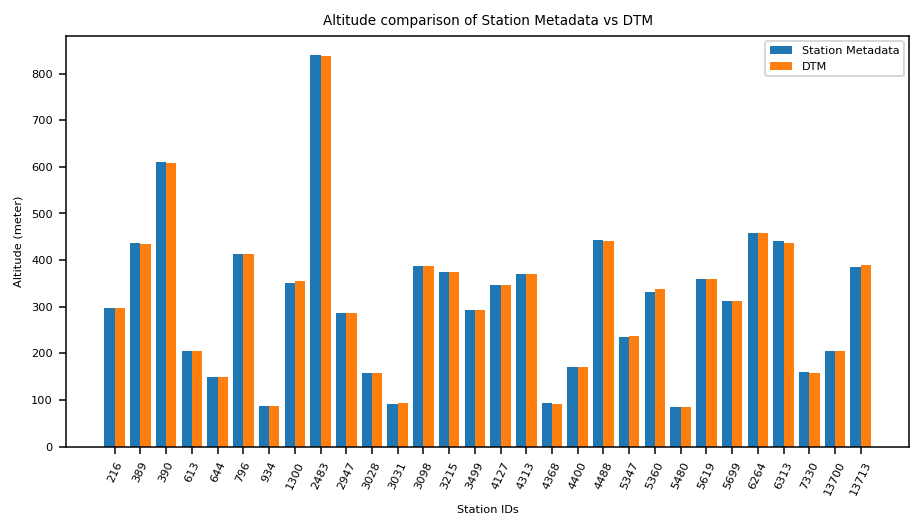

In [26]:
w = 0.4
fig = plt.figure(dpi= 136, figsize=(8,4))

bar1 = np.arange(len(data_dtm['station_id']))
bar2 = [i+w for i in bar1]

plt.bar(bar1,data_dtm['altitude'],w,label='Station Metadata')
plt.bar(bar2,data_dtm['DTM_German'],w,label='DTM')

plt.xlabel('Station IDs')
plt.ylabel('Altitude (meter)')
plt.title('Altitude comparison of Station Metadata vs DTM')
plt.xticks(bar1+w/2,data_dtm['station_id'],rotation=65)
plt.legend()
plt.savefig('C:/Users/Toshiba/Desktop/Master courses/Geoinformatics/Exercises/Exam files/Altitude_Comparison')

plt.show()

## Correlation between Altitude and Total Rainfall 

In [27]:
data_dtm.head()

,fid,field_1,station_id,longitude,latitude,overall_ra,altitude,DTM_German
0,1,0,216,7.8807,51.1143,322.7,298,298.100006
1,2,1,389,8.4318,51.0148,335.8,436,433.500000
2,3,2,390,8.3683,50.9837,378.5,610,609.100037
3,4,3,613,9.2324,51.5677,395.1,206,205.600006
4,5,4,644,9.1738,51.7049,387.6,150,150.199997


### Linear Regression

In [43]:
import scipy.stats
x = data_dtm['altitude']
y = data_dtm['overall_ra']
result = scipy.stats.linregress(x, y)

In [44]:
result.pvalue
#result.slope
#result.intercept
#result.stderr

0.018395966730512872

### Pearson's correlation

In [45]:
r, p = scipy.stats.pearsonr(x, y)
r

0.4276888695581698

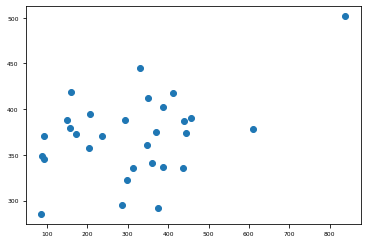

In [37]:
from matplotlib import pyplot

pyplot.scatter(x, y)
pyplot.show()